<a href="https://colab.research.google.com/github/nistha99srivastava/Twitter_sentiment_analysis/blob/main/SDL_AExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

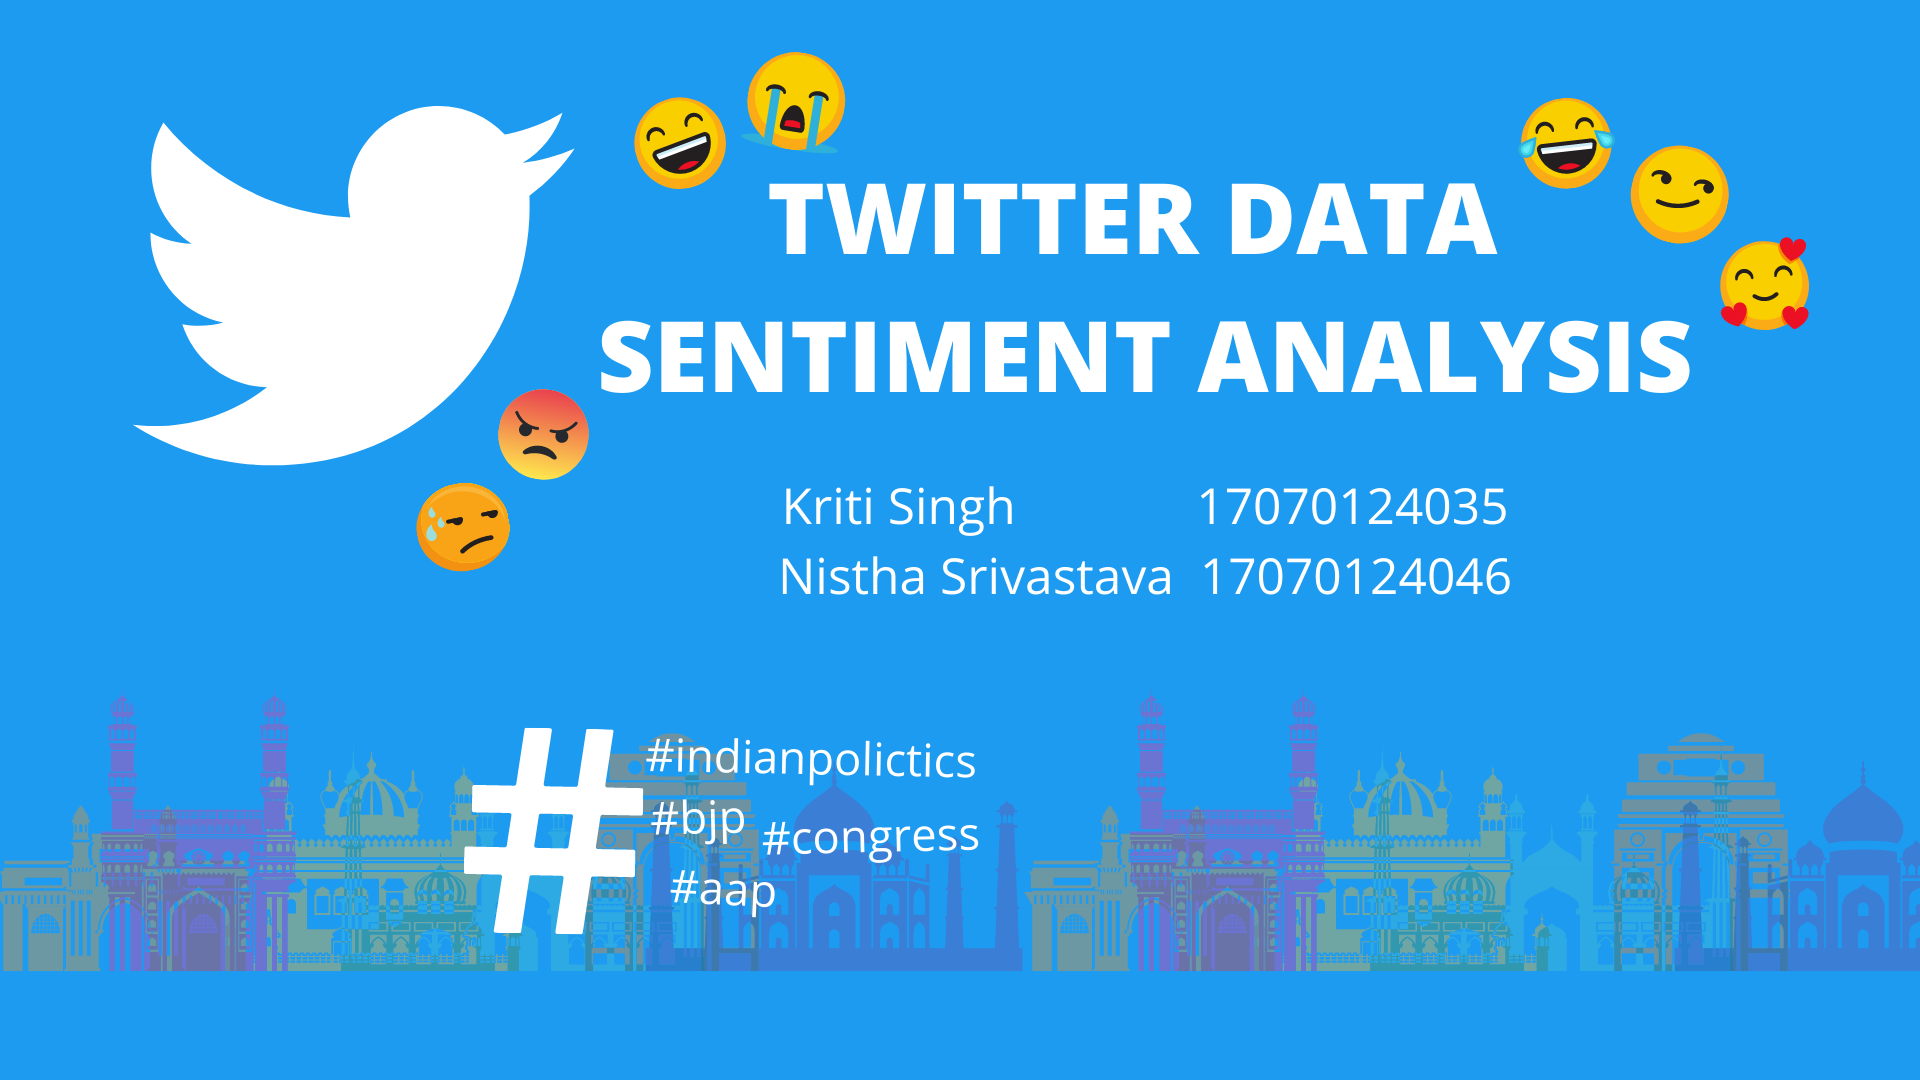

**What is Sentiment Analysis ?**

Sentiment analysis (or opinion mining) is a natural language processing technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

In [ ]:
!pip3 install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 1.0MB 12.8MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=4ffe6c18e6714400fa707c0f1285060661b3341201fbeb17711e38e051a50737
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:
#! git clone https://github.com/kevalmorabia97/pyTweetCleaner

**Importing the neccessary libraries**

Tweepy - *Python library for accessing the Twitter API.*

TextBlob - *TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.*

Pandas -  *A fast, powerful, flexible and easy to use open source data analysis and manipulation tool*

Re - *Regular Expression*

MatPlotLib - *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from googletrans import Translator

Creating an object of translator class


In [ ]:
translator = Translator()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Twitter API Credentials configurations

In [ ]:
config = pd.read_csv("/content/drive/MyDrive/SDL_LAB/config.csv")

Initialising credentials


In [ ]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiBearerToken = config['twitterApiBearerToken'][0]

Authorizing Twitter API


In [ ]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

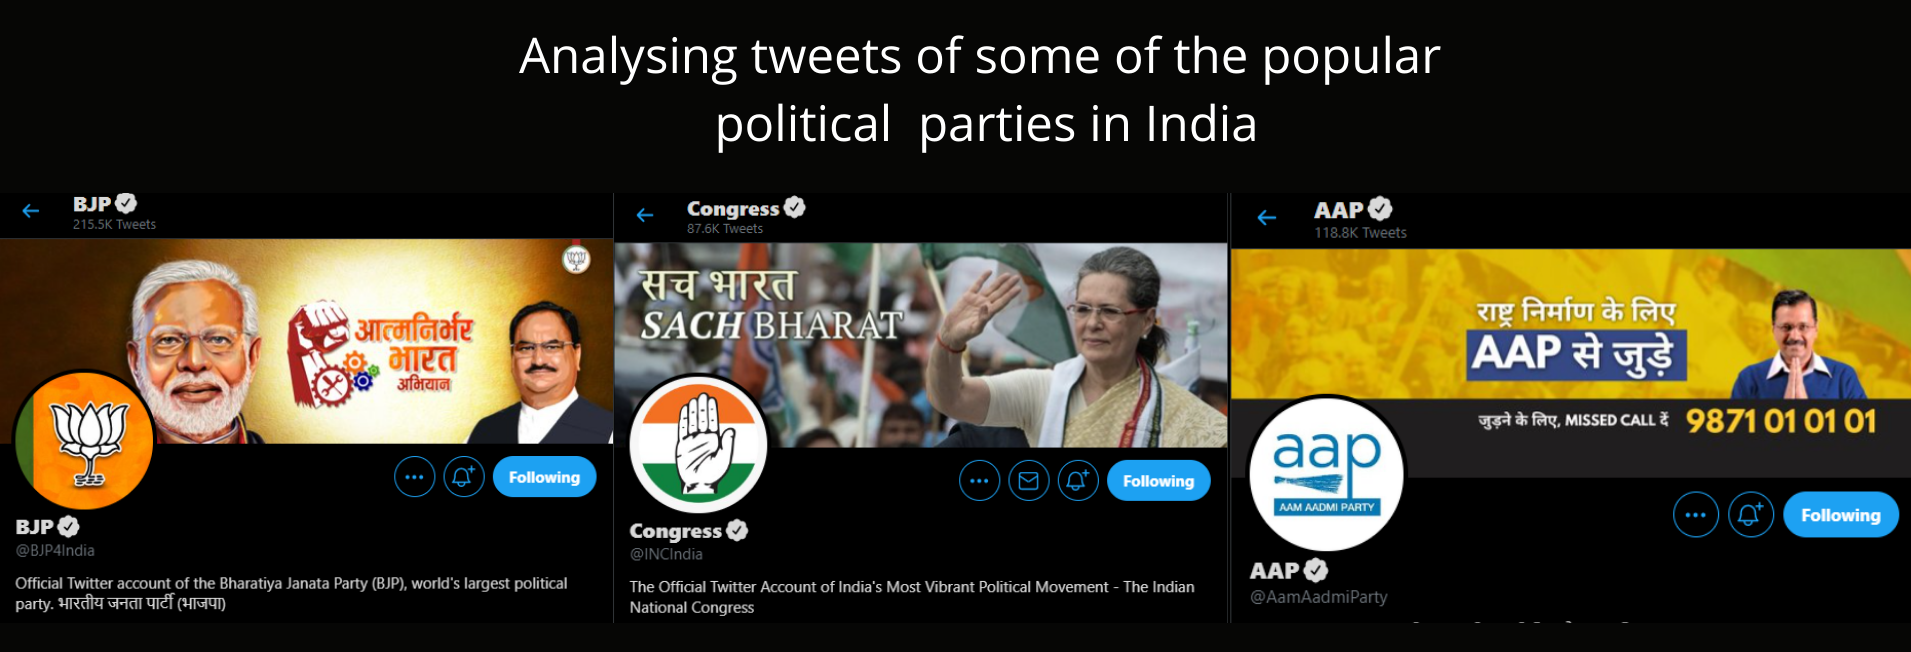

In [ ]:
twitterAccount1 = "BJP4India"
twitterAccount2 = "INCIndia"
twitterAccount3= "AamAadmiParty"

Fetching Tweets from the above mentioned accounts

**Parameters**

  since_id – Returns only statuses with an ID greater than (that is, more recent than) the specified ID.

  count – The number of results to try and retrieve per page.
  max_id – Returns only statuses with an ID less than (that is, older than) or equal to the specified ID.

  trim_user – A boolean indicating if user IDs should be provided, instead of complete user objects. Defaults to False.

  exclude_replies – This parameter will prevent replies from appearing in the returned timeline. Using exclude_replies with the count parameter will mean you will receive up-to count Tweets — this is because the count parameter retrieves that many Tweets before filtering out retweets and replies.

  include_entities – The entities node will not be included when set to false. Defaults to true.

In [ ]:
tweets_BJP = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name=twitterAccount1,
                       count=None,
                       since_id=None,
                       max_id=None, trim_user=True, exclude_replies=True,contributor_details=False,
                       include_entities=False).items(100);

tweets_C = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name=twitterAccount2,
                       count=None,
                       since_id=None,
                       max_id=None, trim_user=True, exclude_replies=True,contributor_details=False,
                       include_entities=False).items(100);             

tweets_AAP = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name=twitterAccount3,
                       count=None,
                       since_id=None,
                       max_id=None, trim_user=True, exclude_replies=True,contributor_details=False,
                       include_entities=False).items(100);

Storing tweets as data frame

In [ ]:
df_BJP= pd.DataFrame(data=[tweet.text for tweet in tweets_BJP], columns=['Tweet'])
df_C= pd.DataFrame(data=[tweet.text for tweet in tweets_C], columns=['Tweet'])
df_AAP= pd.DataFrame(data=[tweet.text for tweet in tweets_AAP], columns=['Tweet'])

In [ ]:

df_C.head(10)

,Tweet
0,RT @rssurjewala: ये है असलियत - \nतीन काले क़ा...
1,Puducherry is all set to reclaim its glorious ...
2,For a government \nthat truly represents \neve...
3,RT @priyankagandhi: आज असम में अंतिम चरण का चु...
4,RT @priyankagandhi: As polling begins in Keral...
5,RT @RahulGandhi: Do cast your votes today- Ind...
6,"कांग्रेस के लिए सोनार बांग्ला जुमला नहीं है, ब..."
7,"Farmers, fisherfolk, women &amp; every single ..."
8,"कांग्रेस असम में असमिया प्रतिष्ठा, संस्कृति, भ..."
9,"Brothers &amp; sisters in-\nAssam, Kerala, Pud..."


In [ ]:
"""
dataset_aap = df_AAP.copy()
dataset_bjp = df_BJP.copy()
dataset_con = df_C.copy()
"""

'\ndataset_aap = df_AAP.copy()\ndataset_bjp = df_BJP.copy()\ndataset_con = df_C.copy()\n'

In [ ]:
#dataset_aap

Function to translate regional language tweets into English

In [ ]:

def conv_eng(df):

  df['Tweet in English'] =" "
  for i in range(0,11):
    count = 0
    try:
      new_text = translator.translate(df["Tweet"][i]).text
      df["Tweet in English"][i] = new_text
    except:
      count = count + 1
  print("No of exceptions : ", count)


Example:

In [ ]:
translator.translate(df_C["Tweet"][3]).text
translator.translate('hola, todo bien?', dest='en').text

'hello, everything okay?'

Translating tweets by INC, BJP and AAP into English

In [ ]:
conv_eng(df_C)
conv_eng(df_BJP)
conv_eng(df_AAP)

No of exceptions :  0
No of exceptions :  0
No of exceptions :  0


In [ ]:
print("5 recent tweets - BJP\n")
print(df_BJP["Tweet in English"][:5])
print("\n*************************************************************************************************\n")

print("5 recent tweets - Cong\n")
print(df_C["Tweet in English"][:5])
print("\n*************************************************************************************************\n")

print("5 recent tweets - AAP\n")
print(df_AAP["Tweet in English"][:5])

5 recent tweets - BJP

0    Vote to build a scam-free Kerala.\n\nCome out ...
1    Vote for development, vote for peace, vote for...
2    Vote for agitation-free, terrorism-free, flood...
3    Vote to propel development while upholding the...
4    Build a golden Bengal\n\nVote for real change\...
Name: Tweet in English, dtype: object

*************************************************************************************************

5 recent tweets - Cong

0    RT @rssurjewala: this is reality -\nAt the out...
1    Puducherry is all set to reclaim its glorious ...
2    For a government \nthat truly represents \neve...
3    RT @priyankagandhi: Today is the last phase el...
4    RT @priyankagandhi: As polling begins in Keral...
Name: Tweet in English, dtype: object

*************************************************************************************************

5 recent tweets - AAP

0    Delhi's Transport Infrastructure will be world...
1    Vaccination in Delhi government hospitals 24

**Cleaning the Tweets**

Removing any hashtags , re-tweets and links

In [ ]:
# cleaning up tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)#Removing handles
  text = re.sub(r'#','',text)#Removing hashtag
  text = re.sub(r'RT','',text) #Removing RTs
  text = re.sub(r'https?:\/\/\S+','',text) #Removing URLs
  return text

df_BJP['Tweet in English'] = df_BJP['Tweet in English'].apply(cleanText)
df_C['Tweet in English'] = df_C['Tweet in English'].apply(cleanText)
df_AAP['Tweet in English'] = df_AAP['Tweet in English'].apply(cleanText)

Removing any emojis from the tweets

In [ ]:
def strip_emoji(text):
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    #RE_EMOJI = re.compile(u'\([\U00010000-\U0010ffff])|\([\U0001F1E0-\U0001F1FF]|\([\U0001F300-\U0001F5FF])|\([\U0001F600-\U0001F64F])|\([\U0001F680-\U0001F6FF])|\([\U0001F700-\U0001F77F])|\([\U0001F780-\U0001F7FF])|\([\U0001F800-\U0001F8FF])|\([\U0001F900-\U0001F9FF])|\([\U0001FA00-\U0001FA6F])|\([\U0001FA70-\U0001FAFF])|\([\U00002702-\U000027B0])|\([\U000024C2-\U0001F251])')
    return RE_EMOJI.sub(r'', text)

df_BJP['Tweet in English'] = df_BJP['Tweet in English'].apply(strip_emoji)
df_C['Tweet in English'] = df_C['Tweet in English'].apply(strip_emoji)
df_AAP['Tweet in English'] = df_AAP['Tweet in English'].apply(strip_emoji)

**Sentiment Analysis using TextBlob**

TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data.

TextBlob returns polarity and subjectivity of a sentence. **Polarity lies between [-1,1]**, ***-1 defines a negative sentiment and 1 defines a positive sentiment***. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. **Subjectivity lies between [0,1].** Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. **TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word.** For English, adverbs are used as modifiers (‘very good’).

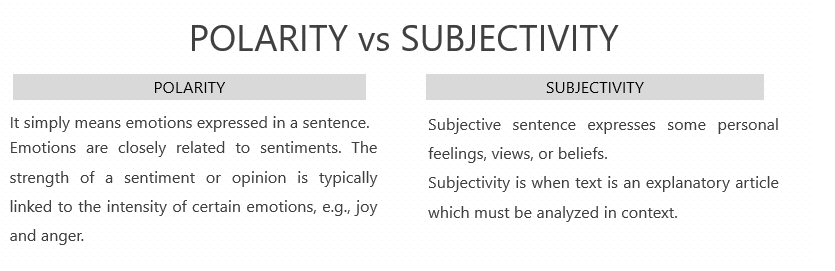

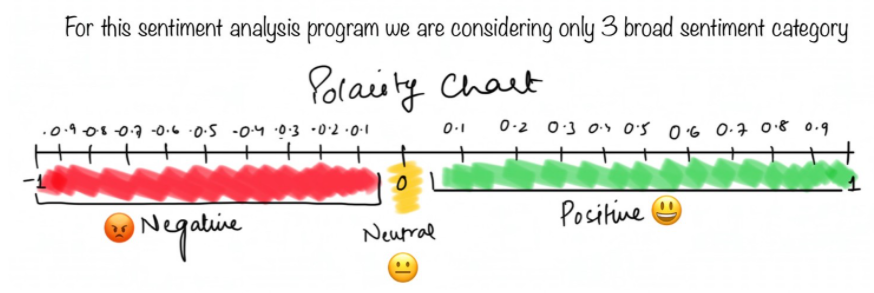

**Analyzing the percentage of postive , negative and neutral tweets posted by the political parties**

BJP has:
4.0% of positive tweets
1.0% of negative tweets
95.0% of neutral tweets


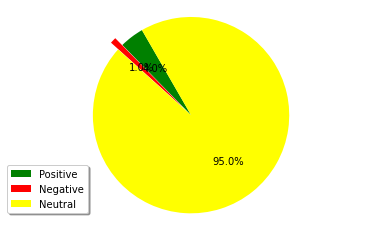

In [ ]:
print("BJP has:")
positive = df_BJP[df_BJP['Score']=='Positive']
print(str(positive.shape[0]/df_BJP.shape[0]*100) + "% of positive tweets")
pos_b = positive.shape[0]/df_BJP.shape[0]*100

negative = df_BJP[df_BJP['Score']=='Negative']
print(str(negative.shape[0]/df_BJP.shape[0]*100) + "% of negative tweets")
neg_b = negative.shape[0]/df_BJP.shape[0]*100

neutral = df_BJP[df_BJP['Score']=='Neutral']
print(str(neutral.shape[0]/df_BJP.shape[0]*100) + "% of neutral tweets")
neu_b = neutral.shape[0]/df_BJP.shape[0]*100

explode=(0,0.1,0)
labels ='Positive','Negative','Neutral'
sizes=[pos_b,neg_b,neu_b]
colors=['#adce74','#e97878','#fce38a']

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig('Sentimental Analysis - BJP.png')

Cong has:
1.0% of positive tweets
3.0% of negative tweets
96.0% of neutral tweets


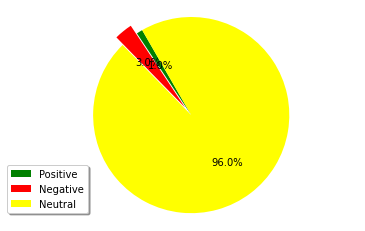

In [ ]:
print("Cong has:")
positive = df_C[df_C['Score']=='Positive']
print(str(positive.shape[0]/df_C.shape[0]*100) + "% of positive tweets")
pos_C = positive.shape[0]/df_C.shape[0]*100

negative = df_C[df_C['Score']=='Negative']
print(str(negative.shape[0]/df_C.shape[0]*100) + "% of negative tweets")
neg_C = negative.shape[0]/df_C.shape[0]*100

neutral = df_C[df_C['Score']=='Neutral']
print(str(neutral.shape[0]/df_C.shape[0]*100) + "% of neutral tweets")
neu_C = neutral.shape[0]/df_C.shape[0]*100

explode=(0,0.1,0)
labels ='Positive','Negative','Neutral'
sizes=[pos_C,neg_C,neu_C]
colors=['#adce74','#e97878','#fce38a']

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig('Sentimental Analysis - Cong.png')

AAP has:
3.0% of positive tweets
2.0% of negative tweets
95.0% of neutral tweets


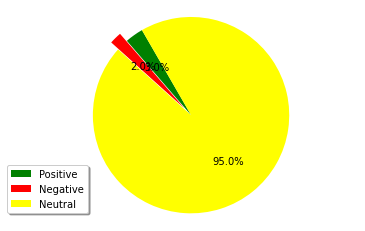

In [ ]:
print("AAP has:")
positive = df_AAP[df_AAP['Score']=='Positive']
print(str(positive.shape[0]/df_AAP.shape[0]*100) + "% of positive tweets")
pos_AAP = positive.shape[0]/df_AAP.shape[0]*100

negative = df_AAP[df_AAP['Score']=='Negative']
print(str(negative.shape[0]/df_AAP.shape[0]*100) + "% of negative tweets")
neg_AAP = negative.shape[0]/df_AAP.shape[0]*100

neutral = df_AAP[df_AAP['Score']=='Neutral']
print(str(neutral.shape[0]/df_AAP.shape[0]*100) + "% of neutral tweets")
neu_AAP = neutral.shape[0]/df_AAP.shape[0]*100

explode=(0,0.1,0)
labels ='Positive','Negative','Neutral'
sizes=[pos_AAP,neg_AAP,neu_AAP]
colors=['#adce74','#e97878','#fce38a']

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig('Sentimental Analysis - AAP.png')

In [ ]:
df_AAP.head(10)

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,विश्वस्तरीय होगा दिल्ली का Transport Infrastru...,Delhi's Transport Infrastructure will be world...,139,0.000000,0.000,Neutral
1,दिल्ली सरकार के अस्पतालों में आज से 24 घंटे टी...,Vaccination in Delhi government hospitals 24 h...,139,0.500000,0.500,Positive
2,UP-हरियाणा से ज्यादा साफ पानी लेने के लिए कोशि...,Efforts intensified to get more clear water fr...,140,0.441667,0.300,Positive
3,Delhi Govt has started 24x7 Vaccination in 1/3...,Delhi Govt has started 24x7 Vaccination in 1/3...,140,0.000000,0.000,Neutral
4,What's more important❓\n\nHealth of Indians or...,What's more important\n\nHealth of Indians or ...,109,0.500000,0.300,Positive
5,BJP-कांग्रेस के 70 साल पर भारी AAP के 6 साल!\n...,6 years of heavy AAP on 70 years of BJP-Congre...,104,0.250000,-0.125,Negative
6,24x7 VACCINATION IN DELHI!💉\n\n➡️Kejriwal Govt...,24x7 VACCINATION IN DELHI!\n\n️Kejriwal Govt o...,140,0.400000,-0.200,Negative
7,RT @ArvindKejriwal: दिल्ली में अब आप किसी भी व...,: Now you can get Corona vaccine in Delhi any...,140,0.000000,0.000,Neutral
8,RT @ImranHussaain: बल्लीमारान विधानसभा में स्थ...,: Situation in the Ballimaran Assembly land o...,139,0.000000,0.000,Neutral
9,World-class Public Transport Infrastructure in...,World-class Public Transport Infrastructure in...,140,0.066667,0.000,Neutral


**Analyzing which political party has the most number of characters in their tweets**

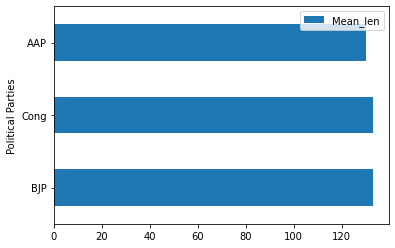

In [ ]:
#who tweets the longest
df_BJP['Length'] = df_BJP['Tweet'].apply(len)
BJP_len = df_BJP['Length'].mean()

df_C['Length'] = df_C['Tweet'].apply(len)
C_len = df_C['Length'].mean()

df_AAP['Length'] = df_AAP['Tweet'].apply(len)
AAP_len = df_AAP['Length'].mean()

df_len = pd.DataFrame({'Political Parties' : ['BJP', 'Cong', 'AAP'], 'Mean_len' : [BJP_len, C_len, AAP_len]})
ax = df_len.plot.barh(x='Political Parties', y='Mean_len')

**Find the latest topics that the political parties are emphasising on using Word Cloud**

For Indian National Congress

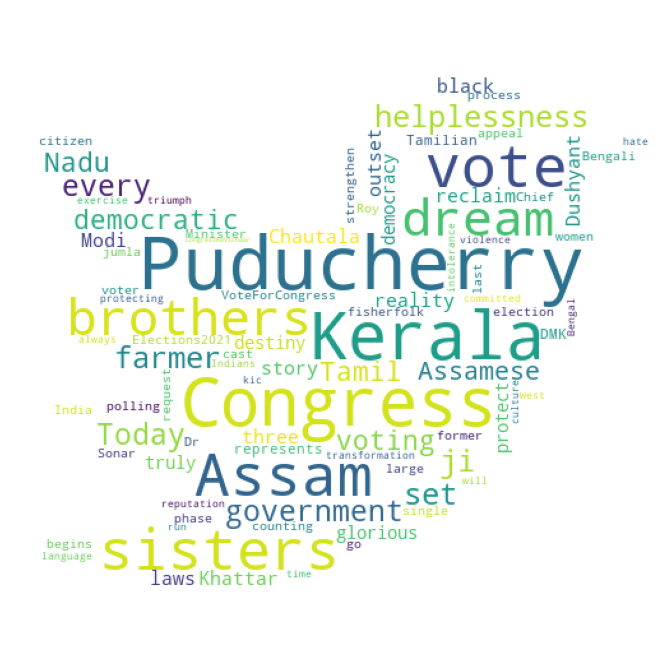

In [ ]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS
import imageio

# join tweets to a single string
words = ' '.join(df_C['Tweet in English'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# create a twitter-style mask for the wordcloud
twitter_mask = imageio.imread('/content/drive/MyDrive/SDL_LAB/twitter-mask.png')

# generate the wordcloud
wordcloud = WordCloud(
                    stopwords = STOPWORDS,
                    background_color='white',
                    width=1800, 
                    height=1400, 
                    mask=twitter_mask
                    ).generate(no_urls_no_tags)

# set the figure size
plt.figure(figsize=(12,12))

# show the wordcloud
plt.imshow(wordcloud)
plt.axis('off');

For Bharatiya Janta Party

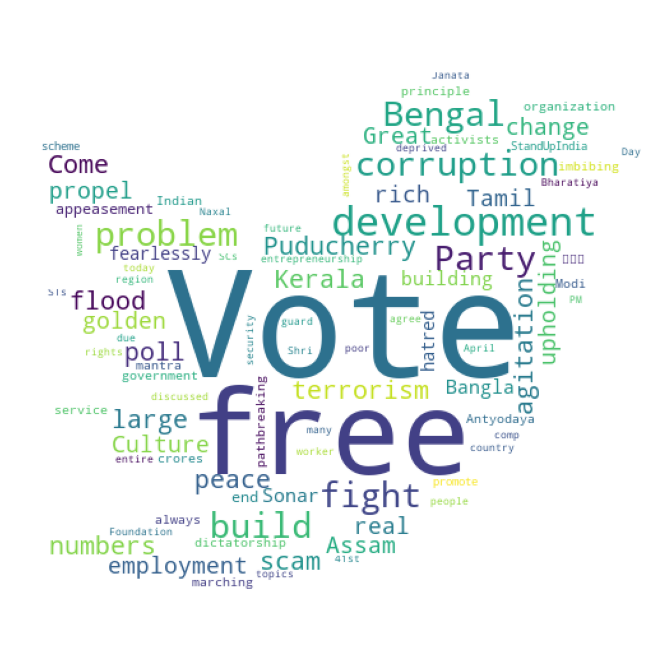

In [ ]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS
import imageio

# join tweets to a single string
words = ' '.join(df_BJP['Tweet in English'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# create a twitter-style mask for the wordcloud
twitter_mask = imageio.imread('/content/drive/MyDrive/SDL_LAB/twitter-mask.png')

# generate the wordcloud
wordcloud = WordCloud(
                    stopwords = STOPWORDS,
                    background_color='white',
                    width=1800, 
                    height=1400, 
                    mask=twitter_mask
                    ).generate(no_urls_no_tags)

# set the figure size
plt.figure(figsize=(12,12))

# show the wordcloud
plt.imshow(wordcloud)
plt.axis('off');

For Aam Admi Party

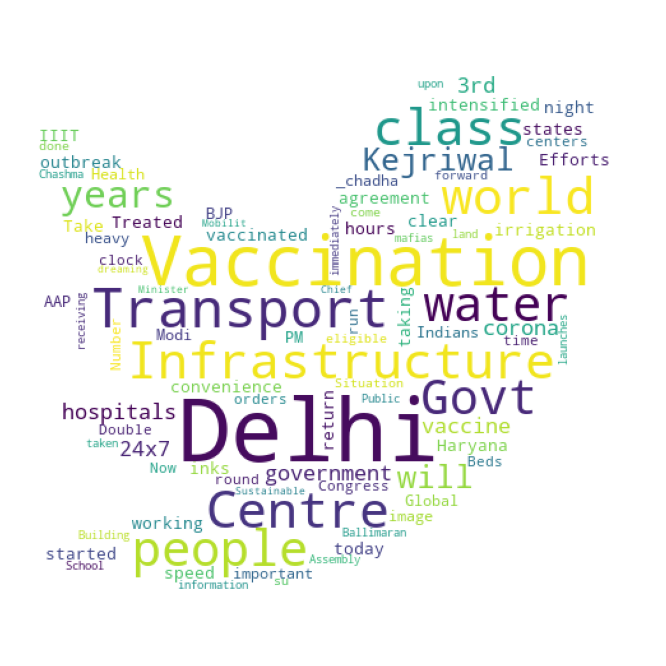

In [ ]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS
import imageio

# join tweets to a single string
words = ' '.join(df_AAP['Tweet in English'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# create a twitter-style mask for the wordcloud
twitter_mask = imageio.imread('/content/drive/MyDrive/SDL_LAB/twitter-mask.png')

# generate the wordcloud
wordcloud = WordCloud(
                    stopwords = STOPWORDS,
                    background_color='white',
                    width=1800, 
                    height=1400, 
                    mask=twitter_mask
                    ).generate(no_urls_no_tags)

# set the figure size
plt.figure(figsize=(12,12))

# show the wordcloud
plt.imshow(wordcloud)
plt.axis('off');

In [ ]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

df_C['Subjectivity']=df_C['Tweet in English'].apply(getTextSubjectivity)
df_C['Polarity']=df_C['Tweet in English'].apply(getTextPolarity)

df_BJP['Subjectivity']=df_BJP['Tweet in English'].apply(getTextSubjectivity)
df_BJP['Polarity']=df_BJP['Tweet in English'].apply(getTextPolarity)

df_AAP['Subjectivity']=df_AAP['Tweet in English'].apply(getTextSubjectivity)
df_AAP['Polarity']=df_AAP['Tweet in English'].apply(getTextPolarity)

In [ ]:
df_C.head()

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,RT @rssurjewala: ये है असलियत - \nतीन काले क़ा...,: this is reality -\nAt the outset of three b...,138,0.433333,-0.208333,Negative
1,Puducherry is all set to reclaim its glorious ...,Puducherry is all set to reclaim its glorious ...,140,0.000000,0.000000,Neutral
2,For a government \nthat truly represents \neve...,For a government \nthat truly represents \neve...,120,0.000000,0.000000,Neutral
3,RT @priyankagandhi: आज असम में अंतिम चरण का चु...,: Today is the last phase election in Assam. ...,140,0.066667,0.000000,Neutral
4,RT @priyankagandhi: As polling begins in Keral...,": As polling begins in Kerala, Tamil Nadu and...",140,0.428571,0.214286,Positive


In [ ]:
df_AAP.head()

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,विश्वस्तरीय होगा दिल्ली का Transport Infrastru...,Delhi's Transport Infrastructure will be world...,139,0.000000,0.0,Neutral
1,दिल्ली सरकार के अस्पतालों में आज से 24 घंटे टी...,Vaccination in Delhi government hospitals 24 h...,139,0.500000,0.5,Positive
2,UP-हरियाणा से ज्यादा साफ पानी लेने के लिए कोशि...,Efforts intensified to get more clear water fr...,140,0.441667,0.3,Positive
3,Delhi Govt has started 24x7 Vaccination in 1/3...,Delhi Govt has started 24x7 Vaccination in 1/3...,140,0.000000,0.0,Neutral
4,What's more important❓\n\nHealth of Indians or...,What's more important\n\nHealth of Indians or ...,109,0.500000,0.3,Positive


In [ ]:
df_BJP.head()

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,Vote to build a scam-free Kerala.\n\nCome out ...,Vote to build a scam-free Kerala.\n\nCome out ...,94,0.428571,0.214286,Positive
1,"Vote for development, vote for peace, vote for...","Vote for development, vote for peace, vote for...",100,0.000000,0.000000,Neutral
2,"आंदोलन मुक्त, आतंकवाद मुक्त, बाढ़ मुक्त और रोज...","Vote for agitation-free, terrorism-free, flood...",102,0.000000,0.000000,Neutral
3,Vote to propel development while upholding the...,Vote to propel development while upholding the...,91,0.750000,0.800000,Positive
4,সোনার বাংলা গড়ে তুলুন\n\nআসল পরিবর্তনের জন্যে...,Build a golden Bengal\n\nVote for real change\...,109,0.400000,0.250000,Positive


In [ ]:
def getTextAnalysis(a):
  if a<0:
    return 'Negative'
  elif a==0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df_C["Score"]=df_C['Polarity'].apply(getTextAnalysis)
df_AAP["Score"]=df_AAP['Polarity'].apply(getTextAnalysis)
df_BJP["Score"]=df_BJP['Polarity'].apply(getTextAnalysis)

In [ ]:
df_BJP.head(10)

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,Vote to build a scam-free Kerala.\n\nCome out ...,Vote to build a scam-free Kerala.\n\nCome out ...,94,0.428571,0.214286,Positive
1,"Vote for development, vote for peace, vote for...","Vote for development, vote for peace, vote for...",100,0.000000,0.000000,Neutral
2,"आंदोलन मुक्त, आतंकवाद मुक्त, बाढ़ मुक्त और रोज...","Vote for agitation-free, terrorism-free, flood...",102,0.000000,0.000000,Neutral
3,Vote to propel development while upholding the...,Vote to propel development while upholding the...,91,0.750000,0.800000,Positive
4,সোনার বাংলা গড়ে তুলুন\n\nআসল পরিবর্তনের জন্যে...,Build a golden Bengal\n\nVote for real change\...,109,0.400000,0.250000,Positive
5,"बंगाल में टोलाबाजी, तुष्टिकरण, भ्रष्टाचार और त...","Vote fearlessly in Bengal for hatred, appeasem...",140,0.000000,0.000000,Neutral
6,"अंत्योदय के सिद्धांत को आत्मसात कर, सेवा ही सं...","By imbibing the principle of Antyodaya, crores...",139,0.000000,0.000000,Neutral
7,Modi government’s pathbreaking #StandUpIndia s...,Modi government’s pathbreaking StandUpIndia sc...,140,0.000000,0.000000,Neutral
8,पीएम श्री @narendramodi 6 अप्रैल 2021 को सुबह ...,PM Shri Party worker on 41st Foundation Day o...,138,0.000000,0.000000,Neutral
9,RT @AmitShah: मैं मानता हूँ इस लड़ाई में कुछ द...,: I agree that there are some problems in thi...,139,0.500000,0.500000,Positive


In [ ]:
df_C.head(10)

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,RT @rssurjewala: ये है असलियत - \nतीन काले क़ा...,: this is reality -\nAt the outset of three b...,138,0.433333,-0.208333,Negative
1,Puducherry is all set to reclaim its glorious ...,Puducherry is all set to reclaim its glorious ...,140,0.000000,0.000000,Neutral
2,For a government \nthat truly represents \neve...,For a government \nthat truly represents \neve...,120,0.000000,0.000000,Neutral
3,RT @priyankagandhi: आज असम में अंतिम चरण का चु...,: Today is the last phase election in Assam. ...,140,0.066667,0.000000,Neutral
4,RT @priyankagandhi: As polling begins in Keral...,": As polling begins in Kerala, Tamil Nadu and...",140,0.428571,0.214286,Positive
5,RT @RahulGandhi: Do cast your votes today- Ind...,: Do cast your votes today- India is counting...,85,0.000000,0.000000,Neutral
6,"कांग्रेस के लिए सोनार बांग्ला जुमला नहीं है, ब...","Sonar is not a Bengali jumla for the Congress,...",138,0.000000,0.000000,Neutral
7,"Farmers, fisherfolk, women &amp; every single ...","Farmers, fisherfolk, women & every single citi...",144,0.214286,-0.071429,Negative
8,"कांग्रेस असम में असमिया प्रतिष्ठा, संस्कृति, भ...",Congress is committed to protecting Assamese r...,138,0.000000,0.000000,Neutral
9,"Brothers &amp; sisters in-\nAssam, Kerala, Pud...","Brothers & sisters in-\nAssam, Kerala, Puduche...",147,0.000000,0.000000,Neutral


In [ ]:
df_AAP.head(10)

,Tweet,Tweet in English,Length,Subjectivity,Polarity,Score
0,विश्वस्तरीय होगा दिल्ली का Transport Infrastru...,Delhi's Transport Infrastructure will be world...,139,0.000000,0.000,Neutral
1,दिल्ली सरकार के अस्पतालों में आज से 24 घंटे टी...,Vaccination in Delhi government hospitals 24 h...,139,0.500000,0.500,Positive
2,UP-हरियाणा से ज्यादा साफ पानी लेने के लिए कोशि...,Efforts intensified to get more clear water fr...,140,0.441667,0.300,Positive
3,Delhi Govt has started 24x7 Vaccination in 1/3...,Delhi Govt has started 24x7 Vaccination in 1/3...,140,0.000000,0.000,Neutral
4,What's more important❓\n\nHealth of Indians or...,What's more important\n\nHealth of Indians or ...,109,0.500000,0.300,Positive
5,BJP-कांग्रेस के 70 साल पर भारी AAP के 6 साल!\n...,6 years of heavy AAP on 70 years of BJP-Congre...,104,0.250000,-0.125,Negative
6,24x7 VACCINATION IN DELHI!💉\n\n➡️Kejriwal Govt...,24x7 VACCINATION IN DELHI!\n\n️Kejriwal Govt o...,140,0.400000,-0.200,Negative
7,RT @ArvindKejriwal: दिल्ली में अब आप किसी भी व...,: Now you can get Corona vaccine in Delhi any...,140,0.000000,0.000,Neutral
8,RT @ImranHussaain: बल्लीमारान विधानसभा में स्थ...,: Situation in the Ballimaran Assembly land o...,139,0.000000,0.000,Neutral
9,World-class Public Transport Infrastructure in...,World-class Public Transport Infrastructure in...,140,0.066667,0.000,Neutral


Polarity and Subjectivity in the tweets posted by the political party

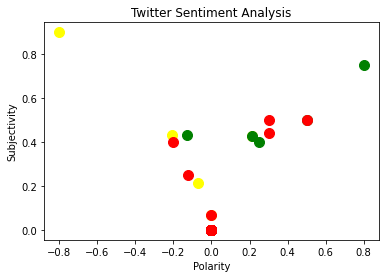

In [ ]:
plt.scatter(df_C["Polarity"],df_C["Subjectivity"], s=100, color='orange')
plt.scatter(df_BJP["Polarity"],df_BJP["Subjectivity"], s=100, color='blue')
plt.scatter(df_AAP["Polarity"],df_AAP["Subjectivity"], s=100, color='green')

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
C_P_mean = df_C['Polarity'].mean()
C_S_mean = df_C['Subjectivity'].mean()

BJP_P_mean = df_BJP['Polarity'].mean()
BJP_S_mean = df_BJP['Subjectivity'].mean()

AAP_P_mean = df_AAP['Polarity'].mean()
AAP_S_mean = df_AAP['Subjectivity'].mean()

<function matplotlib.pyplot.show>

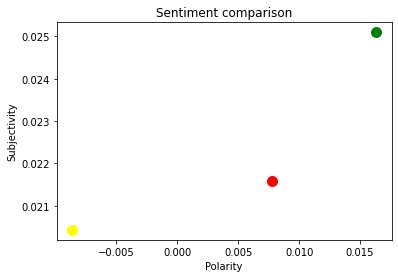

In [ ]:
plt.scatter(C_P_mean, C_S_mean, s=100, color='yellow')
plt.scatter(BJP_P_mean, BJP_S_mean, s=100, color='green')
plt.scatter(AAP_P_mean, AAP_S_mean, s=100, color='red')

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment comparison')
plt.show

*leaders having average polarity of less than 0 - are tweeting negative , and those above zero -  which is good news  are tweeting positive things!*

*subjectivity scores of above 0 do not imply lying, they do imply that the text is stating an opinion or personal belief so with Congress having the highest subjectivity*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#itis assumed to contain stop words, all of which will be removed from the resulting tokens.
vectorizer = TfidfVectorizer(stop_words='english')
#It transforms text to numbers. So with other functions you will be able to count how many times each word existed in the given data set
AAP = vectorizer.fit_transform(df_AAP["Tweet in English"])
BJP = vectorizer.fit_transform(df_BJP["Tweet in English"])
C = vectorizer.fit_transform(df_C["Tweet in English"])

In [ ]:


true_k = 4
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model1.fit(AAP)


model2 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model2.fit(BJP)


model3 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model3.fit(C)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Terminology 

n_clusters : The number of clusters to form as well as the number of centroids to generate.

init : Method for initialization

max_iter : Maximum number of iterations of the k-means algorithm for a single run.

n_init : Number of time the k-means algorithm will be run with different centroid seed

In [ ]:
print("Top terms per cluster for Cong:")
order_centroids3 = model3.cluster_centers_.argsort()[:, ::-1]
#print(order_centroids3)
terms3 = vectorizer.get_feature_names()
#print(terms3)
for i in range(true_k):
    print("\n\nCLUSTER %d:" % (i+1)),
    for ind in order_centroids3[i, :4]:
        print('%s' % terms3[ind]),
    print

Top terms per cluster for Cong:


CLUSTER 1:
dmk
voteforcongress
truly
represents


CLUSTER 2:
puducherry
brothers
sisters
assam


CLUSTER 3:
voting
kerala
women
transformation


CLUSTER 4:
intolerance
indians
violence
hate


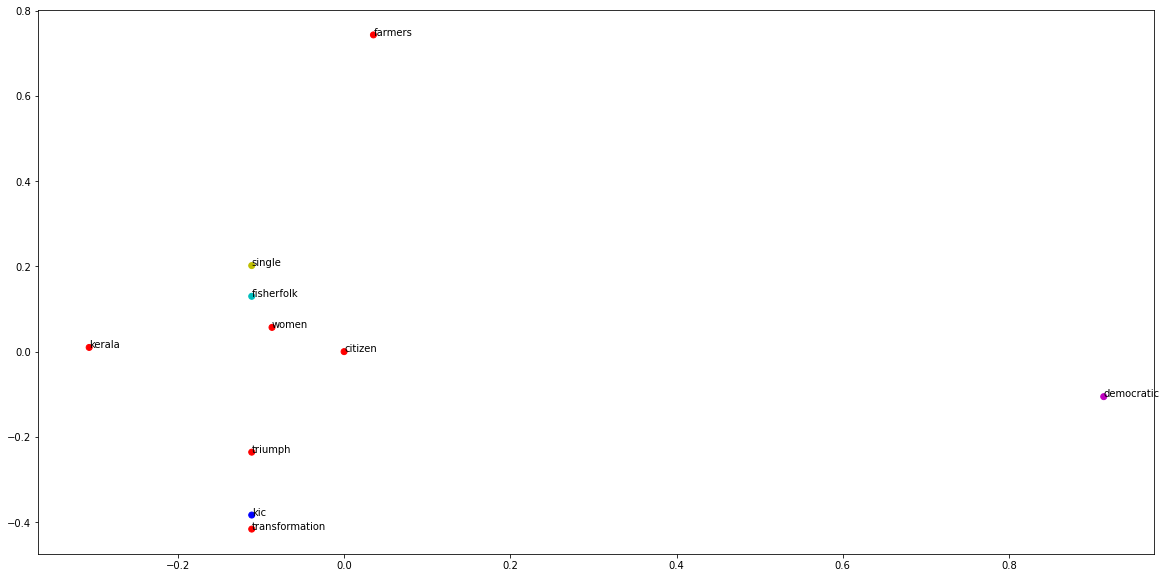

In [ ]:
#cong
cong = []
for i in range(1,11):
  cong.append(terms3[order_centroids3[2][i]]) #retrieving top 10 words to plot

#Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(analyzer = 'word', max_features = 5000, lowercase=True, stop_words = 'english')  
'''
analyzer :A  list is assumed to contain stop words, all of which will be removed from the resulting tokens. 
max_features : If not None, builds a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
lowercase : Convert all characters to lowercase before tokenizing.

'''
vectors = cv.fit_transform(cong)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

#If the input dimension is high Principal Component Algorithm can be used to speed up our machines
#The result gives a reduction of dimension from 32 to 2 features. The first and second PCA will capture the most variance in the original dataset.
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "c", "y", "m" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(cong):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

In [ ]:
print("Top terms per cluster for AAP:")
order_centroids1 = model1.cluster_centers_.argsort()[:, ::-1]
#print(order_centroids1)
#print(len(order_centroids1[2]))
terms1 = vectorizer.get_feature_names()
#print(len(terms1))
for i in range(true_k):
    print("\n\nCLUSTER %d:" % (i+1)),
    for ind in order_centroids1[i, :3]:
        print('%s' % terms1[ind]),
    print

Top terms per cluster for AAP:


CLUSTER 1:
election
democracy
voter


CLUSTER 2:
women
election
transformation


CLUSTER 3:
appeal
voting
request


CLUSTER 4:
west
dream
time


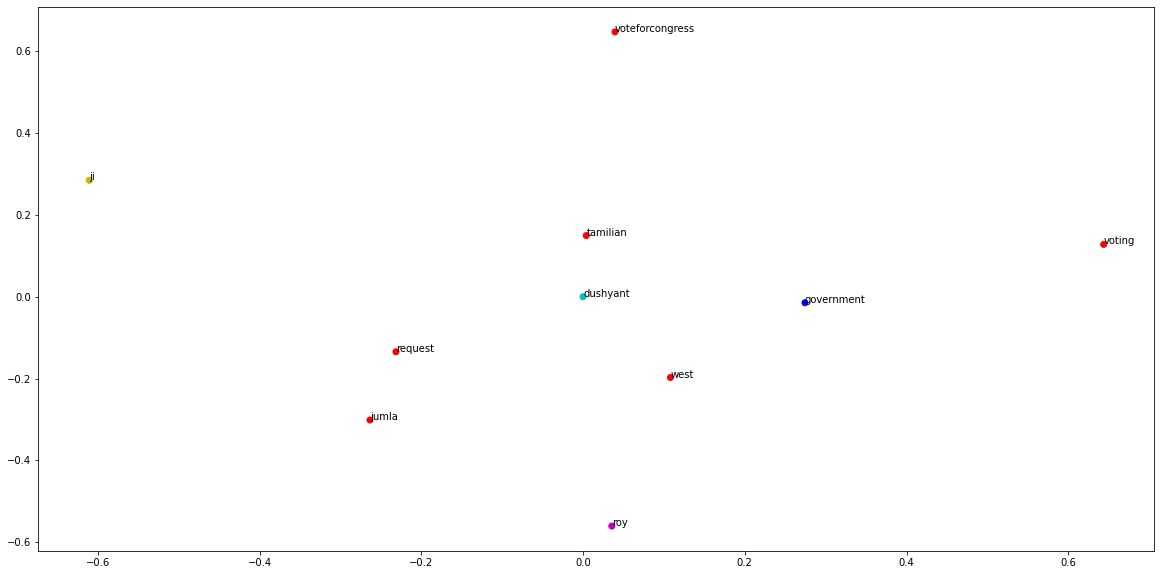

In [ ]:
#aap
aap = []
for i in range(1,11):
  aap.append(terms1[order_centroids1[2][i]])

cv = CountVectorizer(analyzer = 'word', max_features = 5000, lowercase=True, preprocessor=None, tokenizer=None, stop_words = 'english')  
vectors = cv.fit_transform(aap)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "c", "y", "m" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(aap):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

In [ ]:
print("Top terms per cluster for BJP:")
order_centroids2 = model2.cluster_centers_.argsort()[:, ::-1]
#print(order_centroids2)
terms2 = vectorizer.get_feature_names()
#print(len(terms2))
for i in range(true_k):
    print("\n\nCLUSTER %d:" % (i+1)),
    for ind in order_centroids2[i,1:5]:
        print('%s' % terms2[ind]),
    print

Top terms per cluster for BJP:


CLUSTER 1:
intolerance
congresskevichaar
committed
elections2021


CLUSTER 2:
appeal
chautala
dushyant
reputation


CLUSTER 3:
story
reclaim
destiny
elections2021


CLUSTER 4:
votes
democratic
kerala
reality


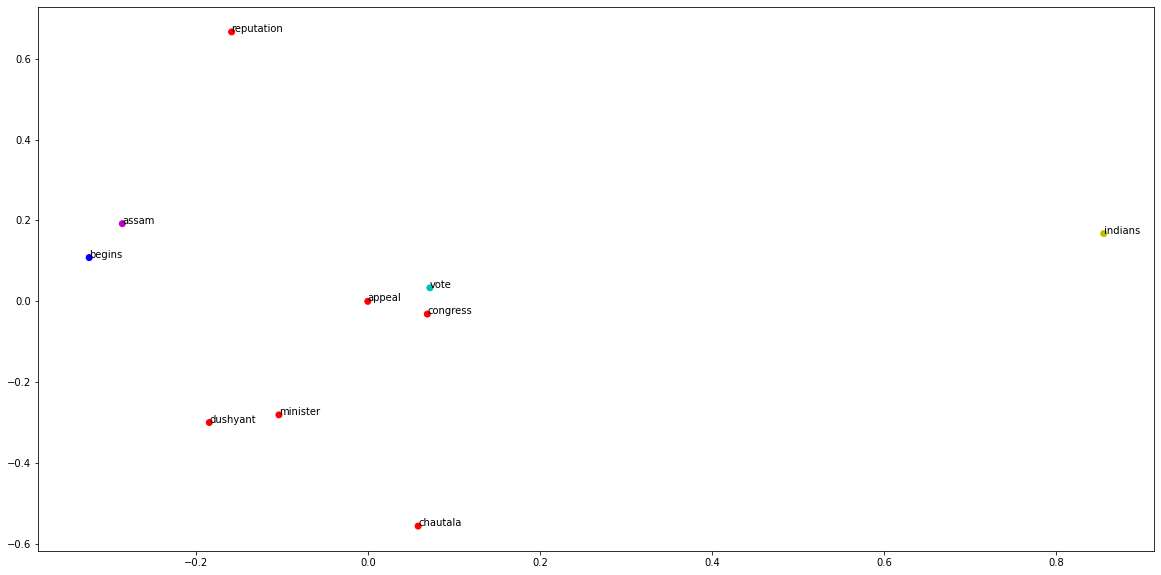

In [ ]:
#bjp
bjp = []
for i in range(1,11):
  bjp.append(terms2[order_centroids2[1][i]])

cv = CountVectorizer(analyzer = 'word', max_features = 5000, lowercase=True, preprocessor=None, tokenizer=None, stop_words = 'english')  
vectors = cv.fit_transform(bjp)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "c", "y", "m" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(bjp):
    ax.annotate(txt, (x_axis[i], y_axis[i]))